In [60]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

In [15]:
df = pd.read_csv('stack_overflow_data.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [16]:
print(f"{df.head()}\n")
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    505
4  2008-08-01 00:00:00       c++    164

                     DATE     TAG  POSTS
2477  2023-06-01 00:00:00     php   2399
2478  2023-06-01 00:00:00  python  12919
2479  2023-06-01 00:00:00       r   2821
2480  2023-06-01 00:00:00    ruby    254
2481  2023-06-01 00:00:00   swift   1280


In [17]:
# print(f"No. of rows: {df.shape[0]}")
# print(f"No. of columns: {df.columns}")
print(f"Dimension: {df.shape}")

No. of rows: 2482
No. of columns: Index(['DATE', 'TAG', 'POSTS'], dtype='object')
Dimension: (2482, 3)


In [19]:
df.count()

DATE     2482
TAG      2482
POSTS    2482
dtype: int64

In [47]:
# No. of posts per language
df.groupby('TAG').sum(numeric_only=True)

,POSTS
TAG,
assembly,42933
c,397344
c#,1595224
c++,795693
delphi,51034
go,69718
java,1900407
javascript,2500729
perl,67704


In [29]:
# Data per language
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,179,179
c,179,179
c#,180,180
c++,179,179
delphi,179,179
go,164,164
java,179,179
javascript,179,179
perl,179,179


## Data Cleaning

Fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [35]:
print(pd.to_datetime(df.DATE[0]))
type(pd.to_datetime(df.DATE[0]))

2008-07-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [36]:
# Coverting string type DATE to datetime data
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [44]:
# Reshaping Dataframe with Date as Row, Language as Column and No. posts as Values
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,189.0,1310.0,4767.0,2224.0,133.0,660.0,5195.0,10452.0,79.0,2430.0,15738.0,3805.0,340.0,1297.0
2023-03-01,180.0,1267.0,4917.0,2575.0,142.0,639.0,5547.0,10558.0,95.0,2285.0,15588.0,3835.0,301.0,1371.0
2023-04-01,198.0,1193.0,3856.0,1975.0,121.0,518.0,4512.0,8330.0,56.0,1942.0,12459.0,3110.0,220.0,1101.0


In [49]:
print(f"Reshaped DataFrame dimensions: {reshaped_df.shape}")

Reshaped DataFrame dimensions: (180, 14)


In [50]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [51]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [53]:
reshaped_df.count()

TAG
assembly      179
c             179
c#            180
c++           179
delphi        179
go            164
java          179
javascript    179
perl          179
php           179
python        179
r             177
ruby          179
swift         171
dtype: int64

In [56]:
# Replacing all NaN values with 0. inplace=True is equivalent to reshaped_df = reshaped_df.fillna(0)
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,189.0,1310.0,4767.0,2224.0,133.0,660.0,5195.0,10452.0,79.0,2430.0,15738.0,3805.0,340.0,1297.0
2023-03-01,180.0,1267.0,4917.0,2575.0,142.0,639.0,5547.0,10558.0,95.0,2285.0,15588.0,3835.0,301.0,1371.0
2023-04-01,198.0,1193.0,3856.0,1975.0,121.0,518.0,4512.0,8330.0,56.0,1942.0,12459.0,3110.0,220.0,1101.0


In [59]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with Matplotlib


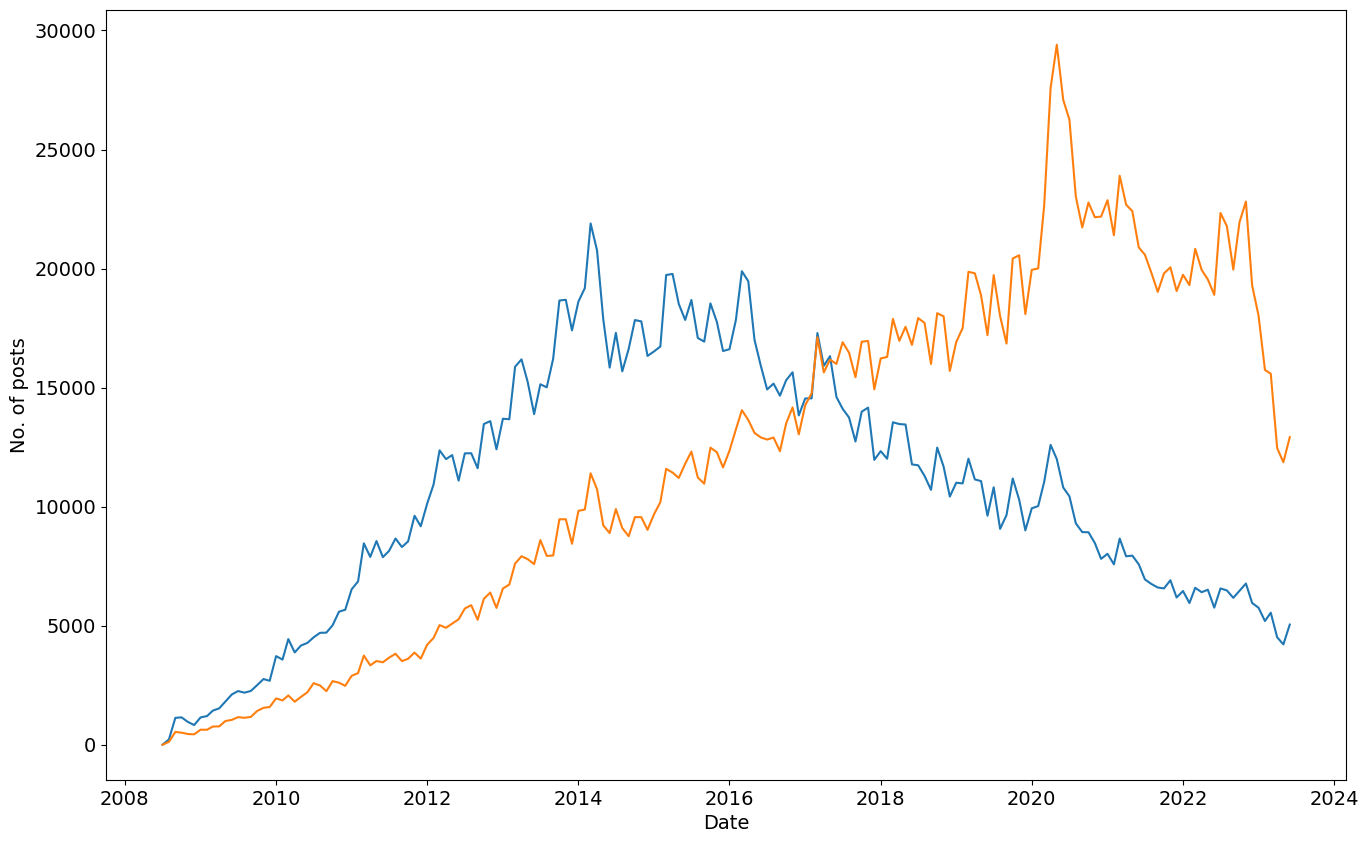

In [75]:
# Using Matplotlib, charting Java and Python popularity through the years
plt.figure(figsize=(16,10)) # Graph size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('No. of posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)
# (or) 
# plt.plot(reshaped_df.index, reshaped_df.java)
# plt.plot(reshaped_df.index, reshaped_df.python)

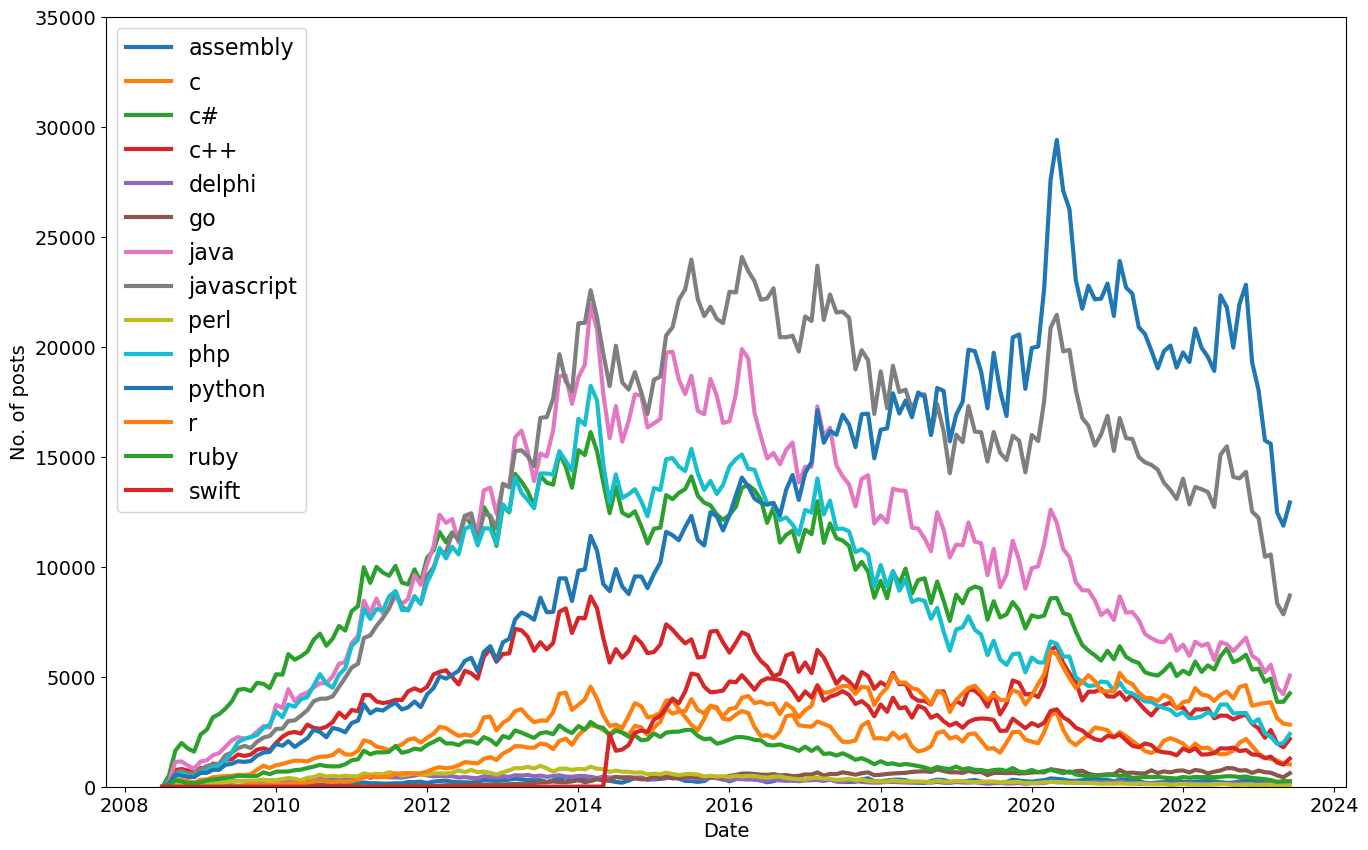

In [78]:
# Using Matplotlib, charting all languages popularity
plt.figure(figsize=(16,10)) # Graph size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('No. of posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16) 

# Smoothing out Time Series Data
[rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

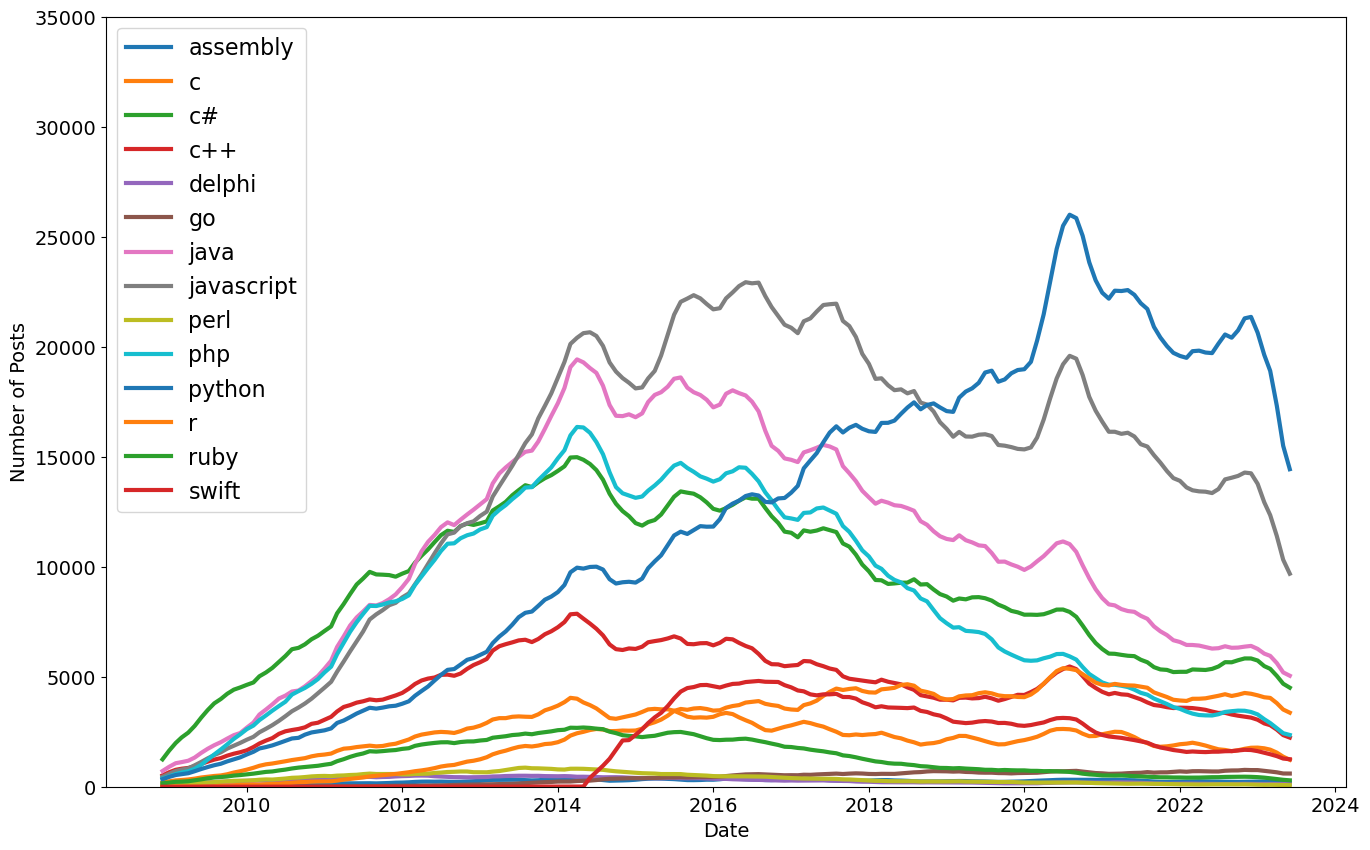

In [82]:
# Smoothing the data
roll_df = reshaped_df.rolling(window=6).mean() # window is the number of observations that are averaged
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)